In [218]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import requests
import json
import petl as etl

In [219]:
data=np.loadtxt('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/Water_Temp_Strain.txt')

In [221]:
T=data[:,0]
W=data[:,1]
q_given=data[:,2]
t0=0
dt=144
tf=t0+(len(T)-1)*dt
t=np.linspace(t0,tf,len(T))
df={'Time':t,'Temperature':T,'Water level':W,'Strain':q_given}
dff=pd.DataFrame(df)

In [222]:
X=dff[['Time','Temperature','Water level']].values
y=dff['Strain'].values
X=sm.add_constant(X)

In [223]:
model=sm.OLS(y,X).fit()

In [224]:
#a
pars=model.params
parn=['beta','alpha','gamma','delta']
for i,x in enumerate(pars):
    print(f'{parn[i]}:{pars[i]}')

beta:-439.5023812074243
alpha:-0.00042984263809531947
gamma:-53.15723364050682
delta:1.4432743355313762


In [225]:
#b
t_3000=t0+(3000-1)*dt
q_3000=pars[0]+t_3000*pars[1]
q_3000

-625.1325035247166

In [239]:
#c
n_samples=len(T)*5
t_final=5*365*24*60
q_5y=pars[0]+t_final*pars[1]
q_5y

-1569.128834121924

In [227]:
#d
actual=y
predicted=model.predict(X)
resd=actual-predicted

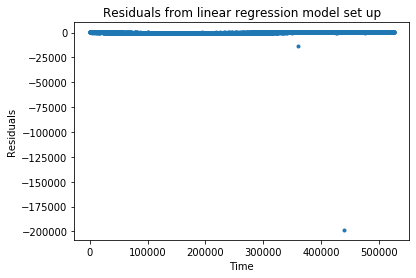

Mean  3.0590509279023714e-13
SD  3293.501826329708


In [228]:
plt.plot(dff['Time'].values,resd,'.')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals from linear regression model set up')
plt.show()
res_mean=resd.mean()
res_sd=resd.std()
print('Mean ',res_mean)
print('SD ',res_sd)

In [229]:
def get_resids(X,y):
    model=sm.OLS(y,X).fit()
    pred=model.predict(X)
    res=y-pred
    return res,pred,model

In [230]:
def cc(X,y):
    res,pred,model=get_resids(X,y)
    m=res.mean()
    sd=res.std()
    d_mean=np.abs(res-m)
    locs=np.where((d_mean>3*sd))
    X_cut=np.delete(X,(*locs),axis=0)
    y_cut=np.delete(y,(*locs),axis=0)
    return X_cut,y_cut,locs[0]

In [231]:
ind=[i for i in range(len(y))]
ind=np.array([ind]).astype(int).T
X2=np.concatenate((ind,X),axis=1)
y2=y[:]

In [232]:
ind=[i for i in range(len(y))]
ind=np.array([ind]).astype(int).T
X2=np.concatenate((ind,X),axis=1)
y2=y[:]
d={}
for i in range(10):
    X_reg=X2[:,1:]
    y_reg=y2
    model2=sm.OLS(y_reg,X_reg).fit()
    pred=model2.predict(X_reg)
    res=y_reg-pred   
    m=res.mean()
    sd=res.std()
    d_mean=np.abs(res-m)
    locs=np.where((d_mean>3*sd))
    X_cut=np.delete(X2,(*locs),axis=0)
    y_cut=np.delete(y2,(*locs),axis=0)   
    res_vals=[y2[j] for j in locs]
    indi=[X2[j,0] for j in locs]
    indi=np.array(indi).astype(int)
    X2=X_cut
    y2=y_cut
    if len(locs[0])!=0:
        print(f'For iteration {i+1}: Values-{(res_vals)} and Locations: {(indi)}')
    if len(locs[0])==0:
        print(model2.params)
        break

For iteration 1: Values-[array([ -13249.53401888, -198650.87634706])] and Locations: [[2499 3049]]
For iteration 2: Values-[array([ 162.45317465,  108.52819178,  130.87725006,  149.46374851,
         -7.69926301,  129.26156096,  -79.22511051, -159.82903911,
       -249.91219726,  -51.00242285, -200.20259576])] and Locations: [[  49  199  349  499  598  599 2199 2959 2969 3199 3299]]
For iteration 3: Values-[array([ 83.09993423,   4.61550081, -15.94964446])] and Locations: [[ 997 1419 2426]]
[ 1.14879353e+01 -3.75975974e-05 -9.86864597e-01  1.55176808e+00]


In [233]:
t_3000=t0+(3000-1)*dt
t_5y=t_final=5*365*24*60
pars2=model2.params
q_3000_2=pars2[0]+t_3000*pars2[1]
q_5y_2=pars2[0]+t_5y*pars2[1]
print(q_3000_2,q_5y_2)

-4.748812770972984 -87.34020700989262


In [234]:
#g
X3=dff[['Time','Water level']].values
y3=dff['Strain'].values
X3=sm.add_constant(X3)
for i in range(10):
    model3=sm.OLS(y3,X3).fit()
    pred=model3.predict(X3)
    res=y3-pred   
    m=res.mean()
    sd=res.std()
    d_mean=np.abs(res-m)
    locs=np.where((d_mean>3*sd))
    X_cut=np.delete(X3,(*locs),axis=0)
    y_cut=np.delete(y3,(*locs),axis=0)   
    X3=X_cut
    y3=y_cut
    if len(locs[0])==0:
        print(i)
        print(model3.params)
        break   

4
[ 1.90283831e+01 -3.53928760e-05  1.65126195e+00]


In [235]:
t_3000=t0+(3000-1)*dt
t_5y=t_final
pars3=model3.params
q_3000_3=pars3[0]+t_3000*pars3[1]
q_5y_3=pars3[0]+t_5y*pars3[1]
print(q_3000_3,q_5y_3)

3.7437572686081637 -74.00448122439485
